# Torsion

## Shaft with circular cross-section

The circle is given by $x^2+y^2=R^2$. 

The Prandtl stress function is given by $\psi = K\left(R^2 - x^2 - y^2\right)$.

In [6]:
import sympy as sp
from IPython.display import Math

x, y, r, R, K = sp.symbols('x, y, r, R, K')

boundary = (R**2 - (x**2 + y**2))

psi = K*boundary

display(Math(r'\psi = {}'.format(sp.latex(psi))))

<IPython.core.display.Math object>

We solve for $K$ by noting that $\psi$ must satisfy the equation $\nabla^2 \psi = -1$.

In [2]:
lhs = sp.diff(psi,x,2) + sp.diff(psi,y,2)
rhs = -1
eq = sp.Eq(lhs,rhs)
sol = sp.solve(eq,K)
Kvalue = sol[0]


display(Math(r'K = {}'.format(sp.latex(Kvalue))))

<IPython.core.display.Math object>

Let us plot the Prandtl stress function. We choose $R = 3$.

In [7]:
Rvalue = 3
boundary_expr = boundary.subs(R,Rvalue)
psi_expr = Kvalue*boundary_expr
display(Math(r'\psi = {}'.format(sp.latex(psi_expr))))

<IPython.core.display.Math object>

For the purpose of plotting, we proceed by making use of the `lambdify` operation. 

In [ ]:
psi_lamb = sp.lambdify((x,y),psi_expr)

import numpy as np

xdata = np.linspace(-1.2*Rvalue,1.2*Rvalue,1000)
ydata = np.linspace(-1.2*Rvalue,1.2*Rvalue,1000)

X,Y = np.meshgrid(xdata,ydata)

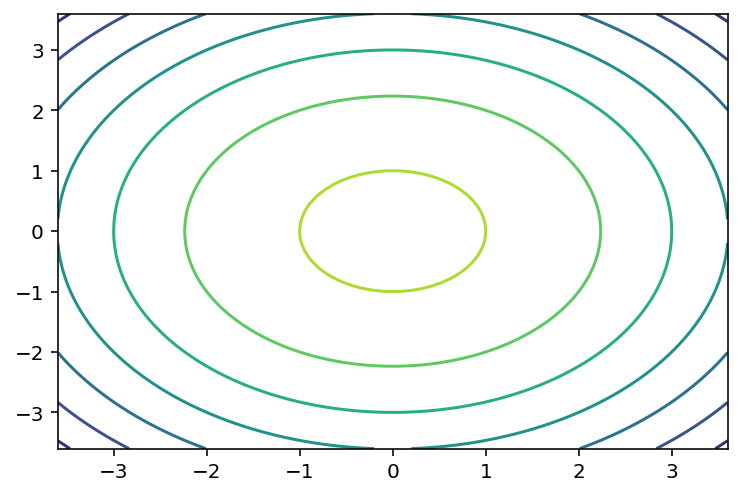

In [20]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(X,Y,psi_lamb(X,Y))

We have used `contour` to draw the projection of the surface of $\psi(x,y)$ on the $xy$-plane. However, we notice that the contour is drawn even for $|x|>3$ and $|y|>3$ even though the actual cross-section should be lying within a circle of radius 3. 

We correct this by "multiplying" the `psi_lamb` with a truth value based on the boundary as follows:

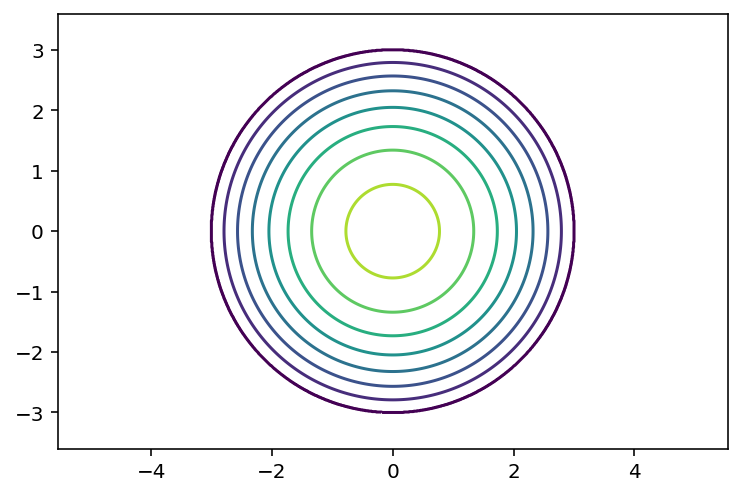

In [21]:
boundary_lamb = sp.lambdify((x,y),boundary_expr)

plt.contour(X,Y,psi_lamb(X,Y)*(boundary_lamb(X,Y)>0))
plt.axis('equal');

In the above code, we have done two important things:

1. The aspect ratio has been set to 1 by using `plt.axis('equal')`.

2. The contour plot has been plotted only for those combinations of values of (X,Y) which lie inside the circle. This has been achieved by using `(boundary_lamb(X,Y)>0)` which is the truth value representing the condition where the value of the bounary expression is greater than 0. For points, lying within the circle (our desired region), the truth value is `True`. One can check this simply by the following:

In [16]:
boundary_lamb(0,0)>0

True

In [19]:
boundary_lamb(3,3)>0

False

Next, we determine the torsional rigidity of the shaft. 

The torsional rigidity is given by $GJ = 4 G \int_A \psi \; {\rm d}A$. (Note that this is the formula for a simply-connected cross-section.)

We display the polar moment of inertia ($J$). The torsional rigidity can be found by just multiplying by $G$. 

It is easier if we exploit the axisymmetry of the geometry and represent the Prandtl stress function in terms of $r = \sqrt{x^2 + y^2}$ so that $\displaystyle \psi = \frac{1}{4} \left(R^2 - r^2 \right)$.

In [3]:
J = sp.integrate(4*K*(R**2-r**2)*2*sp.pi*r,(r,0,R)).subs(K,Kvalue)
display(Math(r'J = {}'.format(sp.latex(J))))

<IPython.core.display.Math object>

## Shaft with elliptical cross-section

The ellipse is given by: $\displaystyle \frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$. 

The Prandtl stress function is given by: $\displaystyle \psi = K \left(1 - \frac{x^2}{a^2} - \frac{y^2}{b^2}\right)$

In [22]:
#from sympy.plotting import plot3d
import matplotlib.pyplot as plt

x, y, a, b, K = sp.symbols('x y a b K')

boundary = (1 - (x**2/a**2 + y**2/b**2))
psi = K*boundary

display(Math(r'\psi = {}'.format(sp.latex(psi))))

<IPython.core.display.Math object>

We solve for $K$ by noting that $\psi$ must satisfy the equation $\nabla^2 \psi = -1$.

In [23]:
lhs = sp.diff(psi,x,2)+sp.diff(psi,y,2)
rhs = -1
eq = sp.Eq(lhs,rhs)
sol = sp.solve(eq,K)
K_sol = sol[0]
display(Math(r'K = {}'.format(sp.latex(K_sol))))

<IPython.core.display.Math object>

Let us plot the Prandtl stress function. We choose: $a = 5$ and $b = 3$. 

In [25]:
avalue = 5
bvalue = 3
Kvalue = K_sol.subs([(a,avalue),(b,bvalue)])
display(Math(r'K|_{{(a=5,b=3)}} = {}'.format(sp.latex(Kvalue))))

<IPython.core.display.Math object>

In [26]:
boundary_expr = boundary.subs([(a,avalue),(b,bvalue)])
psi_expr = Kvalue*boundary_expr

display(Math(r'\psi = {}'.format(sp.latex(psi_expr))))

<IPython.core.display.Math object>

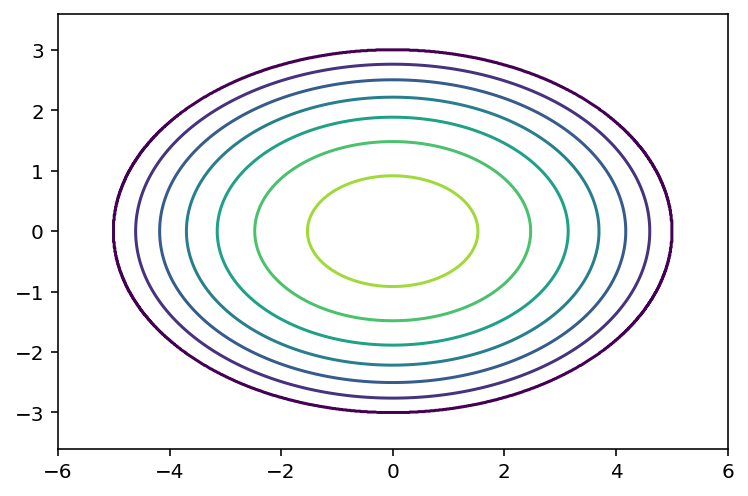

In [28]:
boundary_lamb = sp.lambdify((x,y),boundary_expr)
psi_lamb = sp.lambdify((x,y),psi_expr)


xdata = np.linspace(-1.2*avalue,1.2*avalue,1000)
ydata = np.linspace(-1.2*bvalue,1.2*bvalue,1000)
X, Y = np.meshgrid(xdata,ydata)

plt.contour(X,Y,psi_lamb(X,Y)*(boundary_lamb(X,Y)>0))